# Histograma

Representación gráfica de una variable en forma de barras donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

Nos sirve para ver como se distribuyen los datos aleatorios.

## Análisis de la población española en 2017

Se han descargado los datos oficiales del Instituto Nacional de Estadística (http://www.ine.es), la población residente por fecha, sexo y edad a fecha del 1 de julio de 2017. El fichero [9663c.csv](http://www.ine.es/jaxiT3/Tabla.htm?t=9663&L=0) se encuentra accesible desde el notebook.

In [1]:
poblacion<-read.csv("9663c.csv",skip=6,fileEncoding="ISO-8859-1",header=F)
head(poblacion)

V1,V2,V3,V4,V5
0 años,393112,202106,191005,NA
1 año,419307,215644,203663,NA
2 años,430003,221650,208352,NA
3 años,432554,222917,209637,NA
4 años,443764,228592,215172,NA
5 años,465525,240006,225518,NA


In [2]:
str(poblacion)

'data.frame':	110 obs. of  5 variables:
 $ V1: Factor w/ 110 levels "    0 años","    1 año",..: 1 2 20 31 42 53 64 75 86 97 ...
 $ V2: num  393112 419307 430003 432554 443764 ...
 $ V3: num  202106 215644 221650 222917 228592 ...
 $ V4: num  191005 203663 208352 209637 215172 ...
 $ V5: logi  NA NA NA NA NA NA ...


In [3]:
poblacion$V5<-NULL
colnames(poblacion)<-c("edadTxt","Total","Hombres","Mujeres")
head(poblacion)
tail(poblacion)

edadTxt,Total,Hombres,Mujeres
0 años,393112,202106,191005
1 año,419307,215644,203663
2 años,430003,221650,208352
3 años,432554,222917,209637
4 años,443764,228592,215172
5 años,465525,240006,225518


,edadTxt,Total,Hombres,Mujeres
105,104 años,638,97,542
106,100 y más años,12881,2532,10349
107,105 y más años,730,103,627
108,Notas:,NA,NA,NA
109,Los datos son provisionales desde 1 de Julio de 2017,NA,NA,NA
110,Fuente: Instituto Nacional de Estadística,NA,NA,NA


In [4]:
poblacion<-poblacion[1:105,]
poblacion$edad<-0:104
tail(poblacion)

,edadTxt,Total,Hombres,Mujeres,edad
100,99 años,7894,1773,6121,99
101,100 años,5381,1204,4177,100
102,101 años,3266,675,2591,101
103,102 años,1762,285,1477,102
104,103 años,1103,169,935,103
105,104 años,638,97,542,104


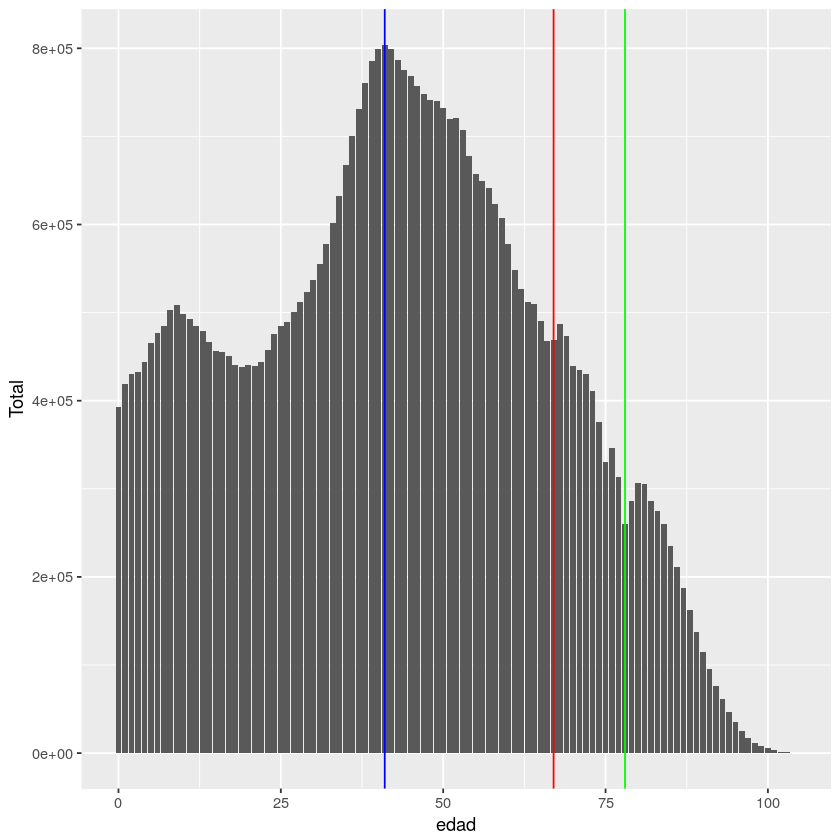

In [20]:
library(ggplot2)
ggplot(data=poblacion,aes(x=edad,y=Total))+geom_col()+
    geom_vline(xintercept=41,color="blue")+
    geom_vline(xintercept=67,color="red")+
    geom_vline(xintercept=78,color="green")

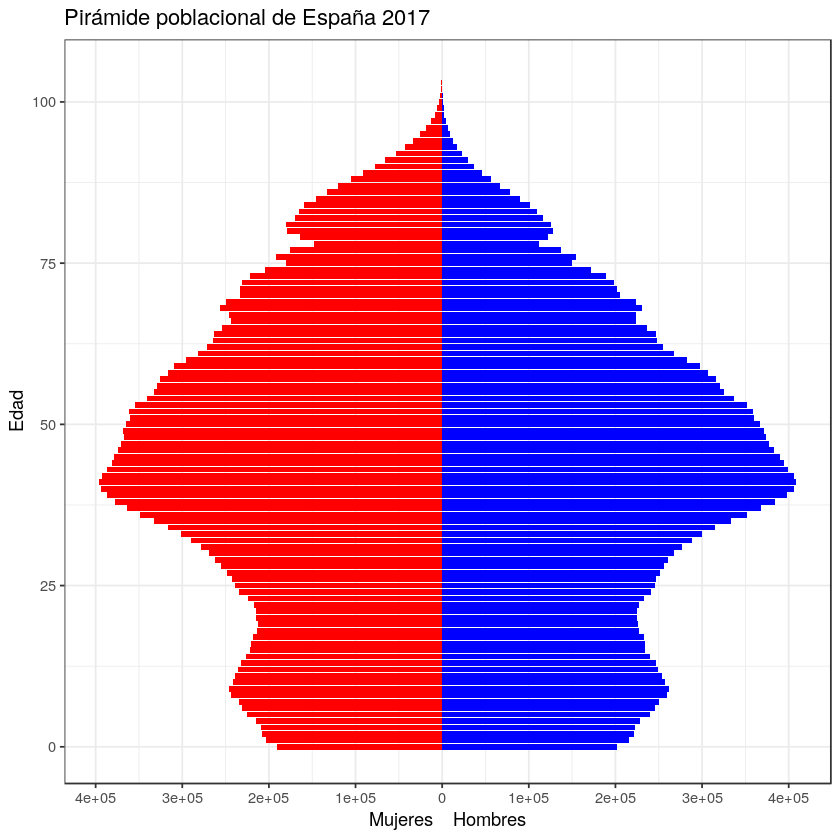

In [6]:
ggplot(data=poblacion,aes(x=edad))+
    geom_col(aes(y=Hombres),fill="blue")+
    geom_col(aes(y=-Mujeres),fill="red")+
    scale_y_continuous(breaks=seq(-5e5,5e5,length.out=11),labels=abs(seq(-5e5,5e5,length.out=11)))+
    xlab("Edad")+ylab("Mujeres    Hombres")+ggtitle("Pirámide poblacional de España 2017")+
    coord_flip()+
    theme_bw()

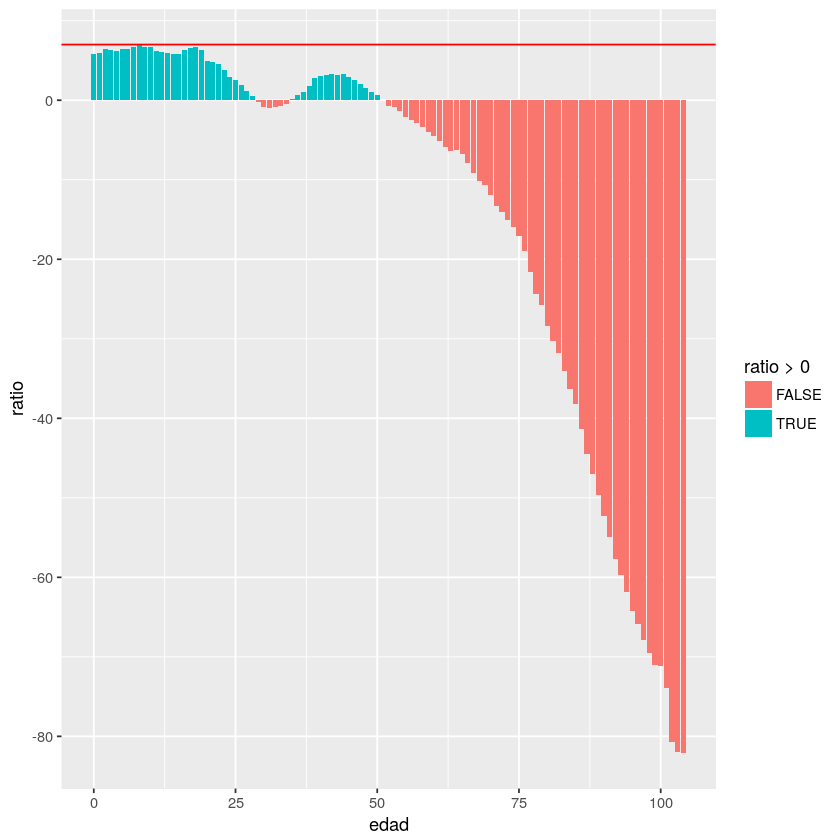

In [27]:
poblacion$ratio<-with(poblacion,(Hombres/Mujeres-1)*100)

ggplot(data=poblacion,aes(x=edad,y=ratio))+
    geom_col(aes(fill=ratio>0))+    
    geom_hline(yintercept=7,color="red")

## Análisis de dataset Iris

Data set de medidas en centímetros de la longitud y anchura de sépalos de tres especies de Iris:  Iris setosa, versicolor, and virginica. 

In [37]:
print(paste("El dataset iris tiene",nrow(iris),"filas"))
head(iris)

[1] "El dataset iris tiene 150 filas"


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Representamos un histograma de la longitud de los sépalos con diferente número de barras.
El aumentar el número de barras nos da una mayor resolución, 
pero tenemos menos precisión porque hay menos muestra por cada barra.
En R el histograma se dibuja con la función *hist()*.

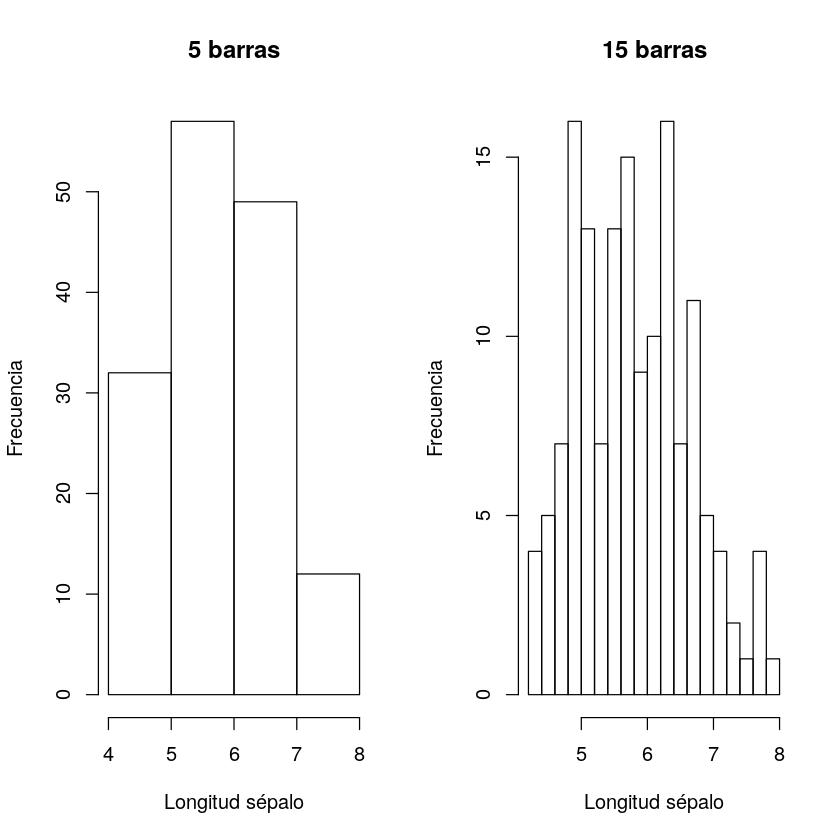

In [36]:
par(mfrow=c(1,2))
hist(iris$Sepal.Length,5,xlab="Longitud sépalo",ylab="Frecuencia",main="5 barras")
hist(iris$Sepal.Length,15,xlab="Longitud sépalo",ylab="Frecuencia",main="15 barras")

Si queremos utilizar *ggplot* para pintar histogramas podemos utilizar la función *geom_histogram()*: 

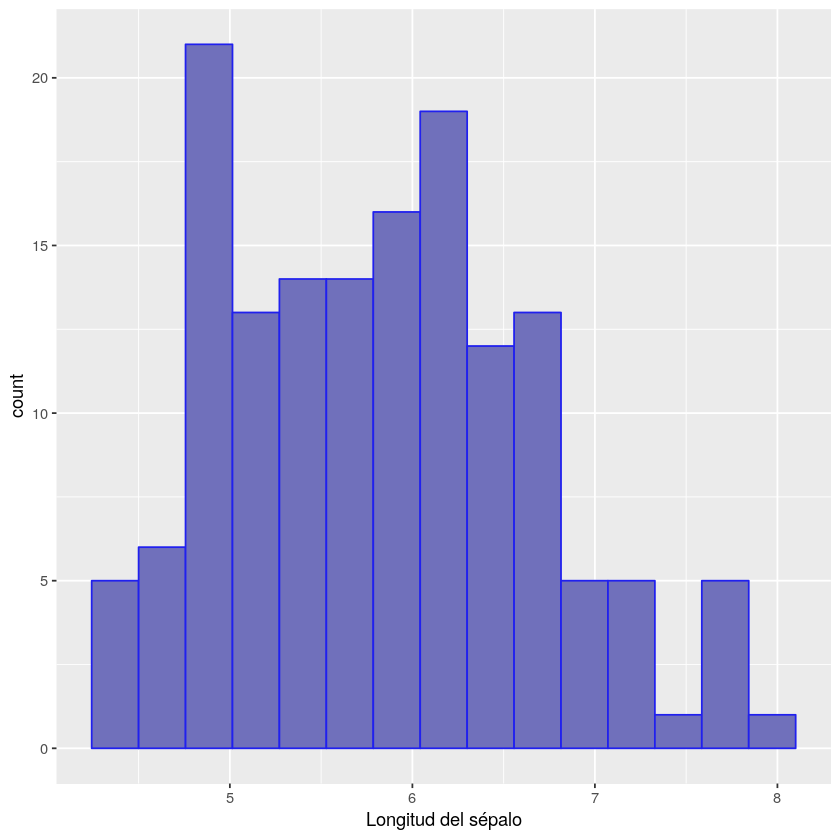

In [41]:
ggplot(data=iris, aes(x=Sepal.Length)) + 
    geom_histogram(bins=15,fill="#7070BB",color="#2020EE")+
    xlab("Longitud del sépalo")

Podemos agrupar los histogramas por la especie. Así podemos ver como se *distribuye* la longitud de cada sépalo en función de la especie.

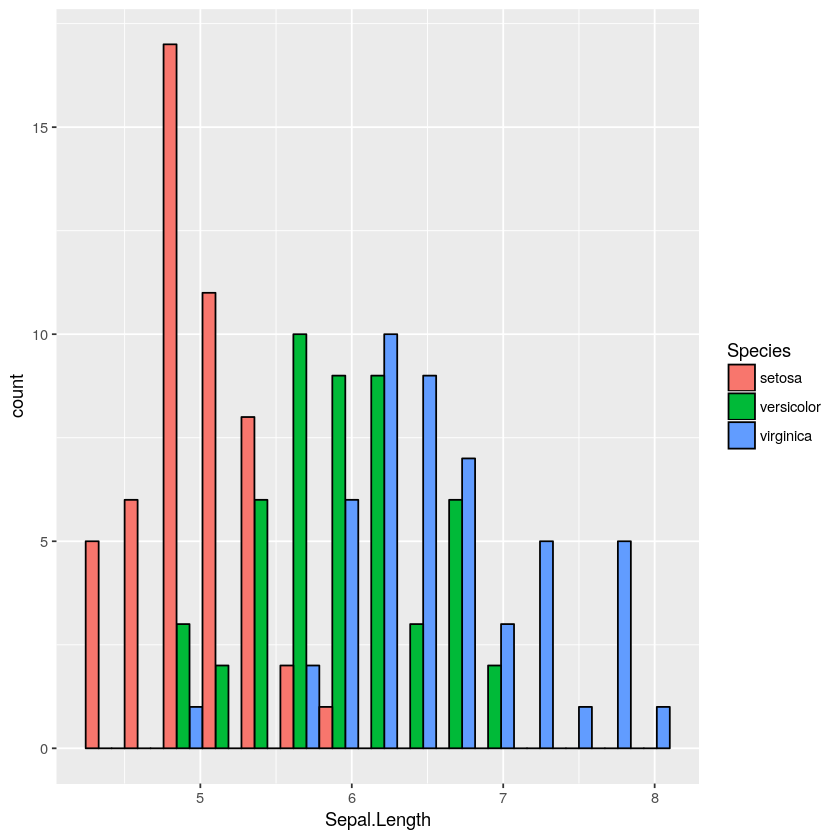

In [43]:
ggplot(data=iris, aes(x=Sepal.Length,fill=Species)) + geom_histogram(color="black",bins = 15, position="dodge")

# Función de densidad de probabilidad

[Función](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) que describe la probabilidad relativa según la cual dicha variable aleatoria domará determinado valor.

Podemos pensar en ella como un histograma con un gran número de barras.

## Propiedades

Supongamos que $f(x)$ es la función de densidad de probabilidad de una variable aleatoria $x$.

Su integral (suma) a lo largo de todo el dominio es igual a 1. Esto significa que la suma de probabilidades de todos los posibles valores será 1.
\\[
\int_{- \infty }^{\infty}f(x) dx = 1
\\]

Su integral (suma) a lo largo de dos puntos $[a,b]$, da la probabilidad de que nuestra variable aleatoria $x$ caiga en ese rango:
\\[
P[a \leq X \leq b])\int_{a }^{b}f(x) dx
\\]




#### Ejemplo

Si elegimos una persona al azar en España, ¿cual es la probabilidad de que sea un *milenial*?

Según la [Wikipedia](https://es.wikipedia.org/wiki/Generaci%C3%B3n_Y#Generaci%C3%B3n_Y_en_el_mundo) los *milenials* podrían comprender los nacidos entre 1980 y 2000.

In [50]:
f_poblacion<-poblacion[,c("Total","edad")]

#Añadimos una columna con la edad
f_poblacion$nacimiento<-2017-f_poblacion$edad

#Creamos la función de probabilidad, 
# la suma debería ser 1 por lo que normalizamos dividiendo entre el total de la población española
f_poblacion$Total<-f_poblacion$Total/sum(f_poblacion$Total)

#De esa función de probabilidad nos quedamos con los que nacieron entre 1980 y 2000
f_poblacion_milenial<-subset(f_poblacion,nacimiento>=1980 & nacimiento<=2000)

print(paste("La probabilidad de que eligiendo una persona al azar en España sea milenial es",
      sum(f_poblacion_milenial$Total)))

[1] "La probabilidad de que eligiendo una persona al azar en España sea milenial es 0.238421342675426"


## Función de distribución acumulativa

Nos dice la probabilidad de obtener un valor menor o igual a cierto umbral dado en nuestra variable aleatoria $x$

\\[
F(x)=P[X \leq a]=\int_{-\infty }^{a}f(x) dx
\\]


#### Ejemplo

Si elegimos una persona al azar en España, ¿cual es la probabilidad de que sea menor o igual de 64 años?

In [61]:
f_poblacion<-poblacion[,c("Total","edad")]

#Creamos la función de probabilidad, 
# la suma debería ser 1 por lo que normalizamos dividiendo entre el total de la población española
f_poblacion$Total<-f_poblacion$Total/sum(f_poblacion$Total)

#De esa función de probabilidad nos quedamos con los que tienen menos de 64 años
f_poblacion_subset<-subset(f_poblacion,edad<=64)

print(paste("La probabilidad de que eligiendo una persona al azar en España su edad sea menor o igual a",
            max(f_poblacion_subset$edad),"años es",
      round(sum(f_poblacion_subset$Total),2)))

[1] "La probabilidad de que eligiendo una persona al azar en España su edad sea menor o igual a 64 años es 0.81"


# Funciones de probabilidad conocidas

## Distribución uniforme

Es una familia de funciones de probabilidad donde cada elemento, dentro de cierto intervalo, 
tiene la misma probabilidad de aparecer.

**Ejemplo:** La lotería, todos los números tienen las mismas posibilidades.

Función de densidad de probabilidad      | Función acumulativa de probabilidad
:---------------------------------------:|:----------------------------------------:
![PDF](func_Uniform_Distribution_PDF.png)| ![PDF](func_Uniform_Distribution_CDF.png)

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=\frac{a+b}{2} \qquad
\sigma^2=\frac{(b-a)^2}{12}
\\]

### Funciones en R

Podemos generar una variable aleatoria que siga una distribución uniforme mediante la función *runif()*.

Por ejemplo si queremos generar 10000 muestras de una distribución uniforme entre 2 y 7 basta con ejecutar:

In [77]:
myUnifVector<-runif(10000,min=2,max=7)

Podemos ver como su histograma se parece bastante a la función de densidad de probabilidad esperada:

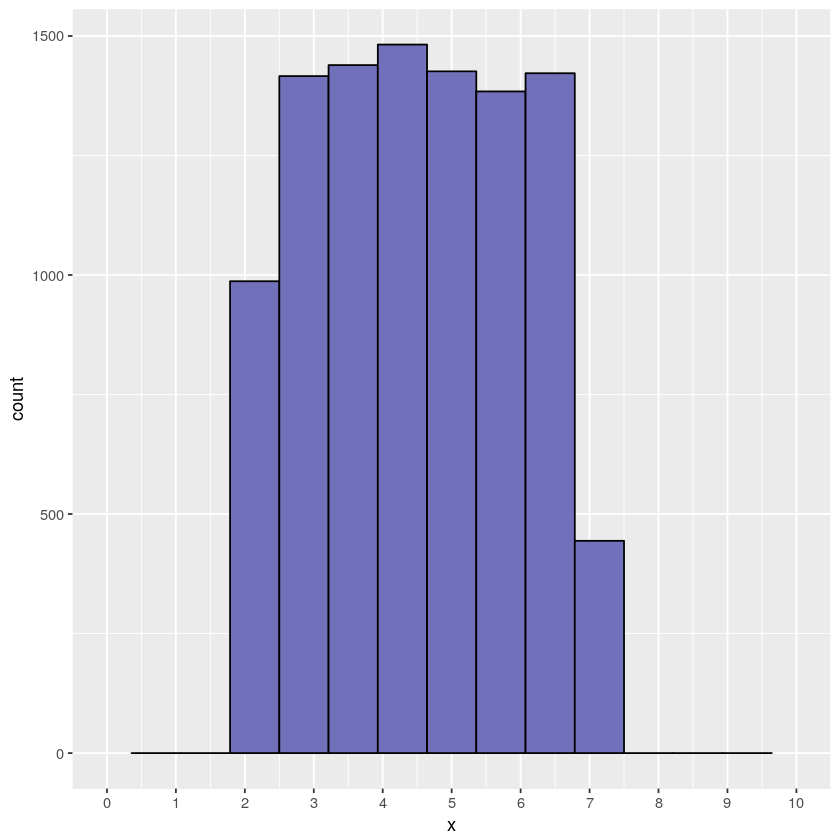

In [83]:
ggplot(data=data.frame(x=myUnifVector), aes(x)) + 
    geom_histogram(bins=15,fill="#7070BB",color="#010101")+
    scale_x_continuous(breaks = seq(0, 10, 1), lim = c(0, 10))

Las barras que se encuentran los límites de la distribución, en 2 y 7, 
aparecen más bajas porque realmente tienen menos elementos. 
Parte de la barra cae fuera de los límites de nuestra distribución uniforme.  

Esto se puede solucionar haciendo las barras más finas, 
añadiendo más barras a costa de empeorar la precisión.

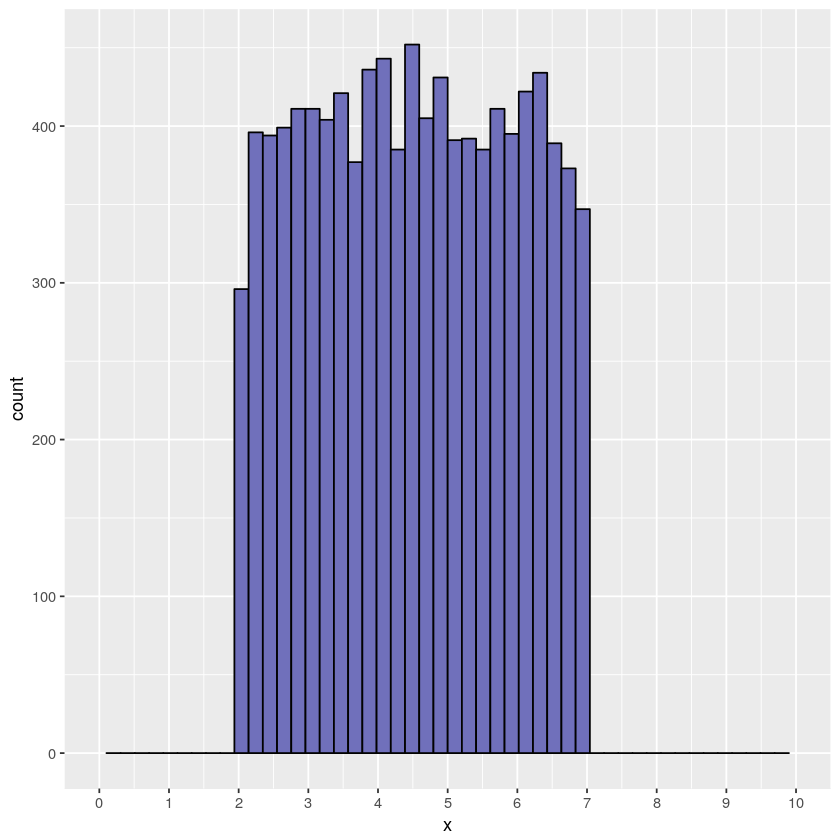

In [85]:
ggplot(data=data.frame(x=myUnifVector), aes(x)) + 
    geom_histogram(bins=50,fill="#7070BB",color="#010101")+
    scale_x_continuous(breaks = seq(0, 10, 1), lim = c(0, 10))

Cuantas más barras utilicemos, más resolución tendremos, 
pero demasiada nos puede alejar de la función de densidad de probabilidad real.

Si tenemos pocas muestras el histograma aparecerá con muchas variaciones, 
puede ser dificil intuir la función de densidad de probabilidad. 

Lo ideal sería utilizar unas **barras muy estrechas** para calcular el histograma y luego **suavizar** la función resultante
para evitar los saltos bruscos. Si posteriormente normalizamos por el número de muestras acabamos con una estimación
de la **función de densidad de probabilidad**.

La librería *ggplot* incorporta la función *geom_density()* que hace eso mismo, 
estima la función de densidad de probabilidad utilizando diferentes funciones de suavizado.


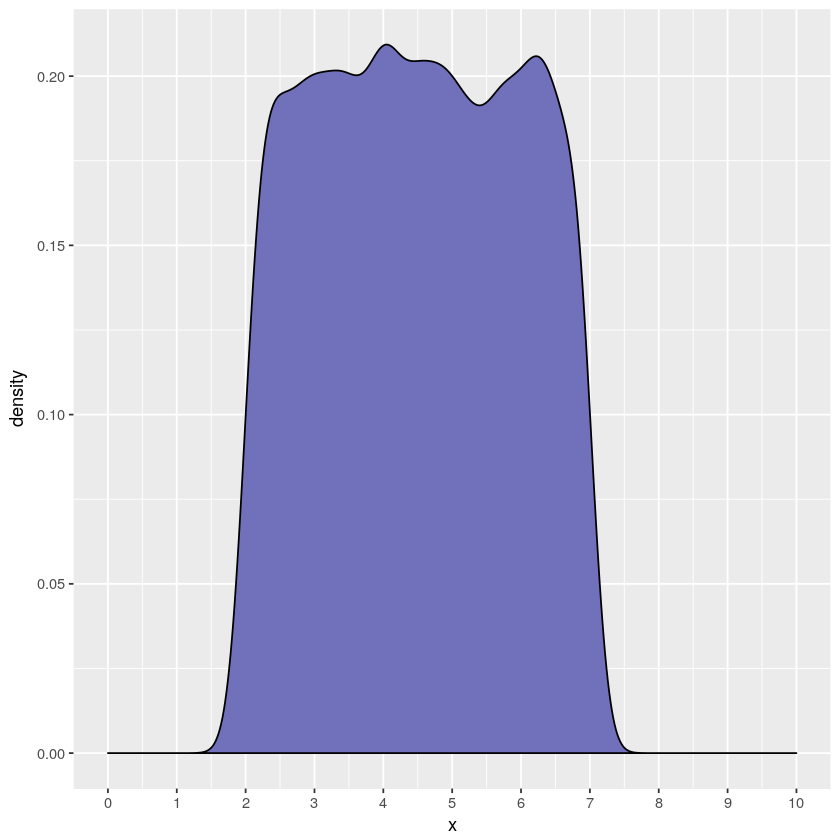

In [94]:
ggplot(data=data.frame(x=myUnifVector), aes(x)) + 
    geom_density(fill="#7070BB",color="#010101")+
    scale_x_continuous(breaks = seq(0, 10, 1), lim = c(0, 10))

Por la función de suavizado (llamada kernel) es una gaussiana, pero en nuestro caso particular encajaría mejor una función rectangular que tiene una caida más abrupta. 

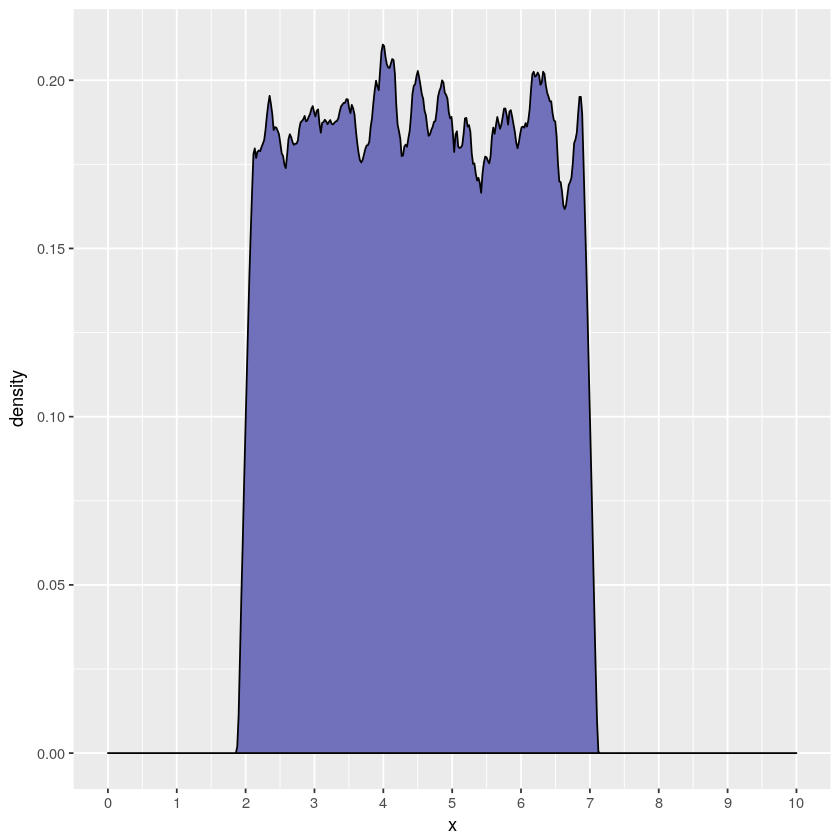

In [100]:
ggplot(data=data.frame(x=myUnifVector), aes(x)) + 
    geom_density(fill="#7070BB",color="#010101",kernel="rectangular",bw=0.07)+
    scale_x_continuous(breaks = seq(0, 10, 1), lim = c(0, 10))

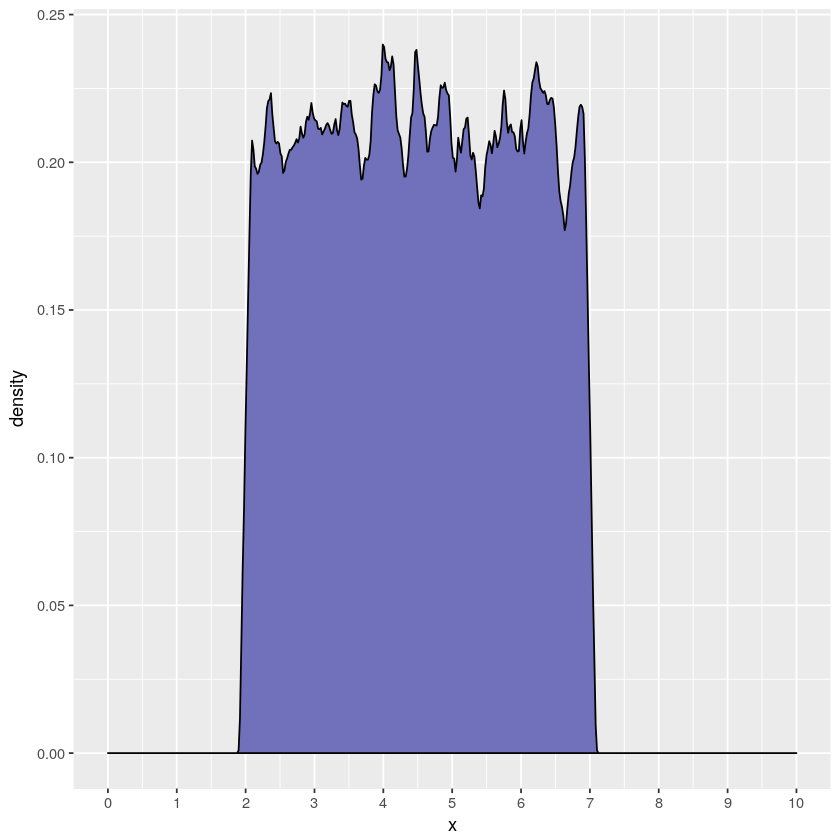

In [91]:
ggplot(data=data.frame(x=myUnifVector), aes(x)) + 
    geom_density(fill="#7070BB",color="#010101",kernel="rectangular",bw=0.05)+
    scale_x_continuous(breaks = seq(0, 10, 1), lim = c(0, 10))

## Distribución de Bernoulli

Es una distribución discreta que puede tomar dos valores uno con probabilidad $p$ y otro $q=1-p$. Se utiliza para describir sucesos que solo tienen dos posibles resultados como Si/No, 1/0 o Cara/Cruz.

**Ejemplo:**  Tiramos una vez una moneda al aire.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=p \qquad
\sigma^2=p·q=p·(1-p)
\\]

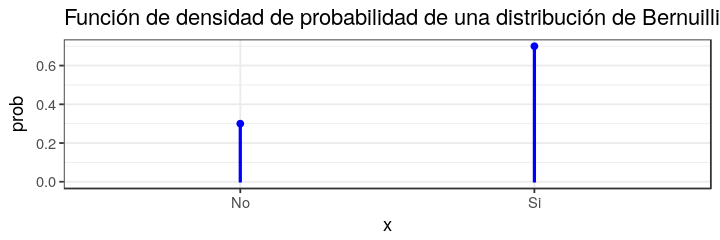

In [120]:
options(repr.plot.height=2,repr.plot.width=6)
p<-0.7
q<-1-p
df<-data.frame(x=c("Si","No"),prob=c(p,q))
ggplot(data=df,aes(x=x,y=prob))+geom_point(color="blue")+geom_col(width = 0.005,color="blue")+
 theme_bw()+ggtitle("Función de densidad de probabilidad de una distribución de Bernuilli")

La función de densidad de probabilidad se puede representar como:
\\[
f(k;p)= \left\\{ 
\begin{matrix} 
p & \text{si  } k=1 \\  
1-p & \text{si  } k=0 
\end{matrix}
\right.
\\]
donde $k$ solo admite dos posibles valores $k \in \left\{0,1 \right\}$.

Esta formula también se puede expresar como:
\\[
f(k;p)=p^k(1-p)^{1-k}
\\]

La distribución de Bernoulli es un caso especial de la **distribución binomial** con n=1.


Podemos simular una distribución de Bernoulli a partir de una uniforme simplemente comparando si el valor supera un umbral que viene determinado por la probabilidad de la distribución binomial:

In [168]:
p<-0.7
runif(10,min=0,max=1)>p

[1] FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE

## Distribución binomial

La distribución binomial es una generalización de la distribución de Bernoulli para $n$ sucesos independientes, cada uno de los cuales tiene dos posibles resultados Si/No con probabilidad $p$.

**Ejemplo:** Tiramos al aire 3 monedas y mirarmos cual es la probabilidad de que 2 salgan cara.

Variables que definen la distribución:
* p - probabilidad de éxito de un caso individual
* n - número de eventos totales que se desean medir
* k - número de eventos que ha salido SI.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=n·p \qquad
\sigma^2=n·p·(1-p)
\\]


**Combinatoria**

Para entender como se comporta una distribución binomial primero tenemos que entender un poco como funciona la combinatoria.

Queremos saber el número de formas diferentes que hay de obtener, sin tener en cuena el orden, de que $k$ objetos puedan ser elegidos dentro de un conjunto de $n$ objetos. Es decir, el número de subconjuntos de $k$-elementos que se pueden obtener de un conjunto de $n$ elementos.

**Ejemplo**: Si tenemos 3 monedas diferentes, ¿cuantas formas posibles hay de agruparlas en grupos de dos?

   |   |
:--------:|:--------:|:--------:
        | Moneda 2 | Moneda 3 
Moneda 1  |          | Moneda 3 
Moneda 1  | Moneda 2 | 

El resultado es 3, hay 3 formas posibles de combinar 3 monedas diferentes en grupos de 2.

Este calculo se puede realizar con el **coeficiente binomial**:
\\[
\binom{n}{k}=\frac{n!}{k!(n-k)!}
\\]
Para nuestro ejemplo:
\\[
\binom{3}{2}=\frac{3!}{2!(3-2)!}=\frac{3·2·1}{2·1·1!}=3
\\]

**Función de densidad de probabilidad**

Si tenemos $n$ sucesos independientes que siguen una distribución de Bernoulli, ¿cual es la probabilidad de que $k$ sucesos sean positivos?. 
Si sabemos que la probabilidad de un suceso ($k=1$) que sigue una distribución Bernoulli viene dada por la función de distribución:
\\[
    Pr_{Bernoulli}(X=k)=p^k(1-p)^{n-k} \\qquad k \in \left\\{0,1 \right\\}.
\\]

Al tener $k$ sucesos donde $k \in \left\{0,1,2,...,n \right\}$, la función será la de Bernoulli multiplicada por el coeficiente binomial que acabamos de ver:
\\[
Pr(X=k)=\binom{n}{k}p^k(1-p)^{n-k}
\\]
La función cumulativa será:
\\[
Pr(X \leq k)= \sum_{i=0}^{k-1} \binom{n}{k}p^k(1-p)^{n-k}
\\]



Función de densidad de probabilidad. [Fuente](https://en.wikipedia.org/wiki/Binomial_distribution)      | Función acumulativa de probabilidad
:---------------------------------------:|:----------------------------------------:
![](./func_Binomial_Distribution_PDF.png)| ![PDF](func_Binomial_Distribution_CDF.png)

A medida que $n$ se acerca a $\infty$ y $p$ se acerca a $0$, entonces la función de probabilidad de una binomial se acerca a una distribución de **Poisson** con media $\lambda=n·p$

### Ejemplo Monedas

Tiramos 3 monedas (no trucadas) al aire, ¿cual es la probabilidad de que salgan dos caras?

Si tiramos 3 monedas, los posibles resultados se muestran en la siguiente tabla:

Moneda 1  | Moneda 2 | Moneda 3 
:--------:|:--------:|:--------:
(ʘ‿ʘ)  | (ʘ‿ʘ) | (ʘ‿ʘ)
 **X** | **(ʘ‿ʘ)** | **(ʘ‿ʘ)**
**(ʘ‿ʘ)**  | **X** | **(ʘ‿ʘ)**
  X    |   X   | (ʘ‿ʘ)
**(ʘ‿ʘ)**  | **(ʘ‿ʘ)** | **X**
  X    | (ʘ‿ʘ) |   X
(ʘ‿ʘ)  |   X   |   X
  X    |   X   |   X

Al ser la probabilidad de cara igual a la probabilidad de cruz todos los resultados son equiprobables. De los 8 resultados posibles solo 3 serían válidos, así que la probabilidad es $3/8=0.375$

Si lo resolvemos con la fórmula de la binomial donde $n=3$, $k=2$ y $p=0.5$:
\\[
Pr(X=2)=\binom{n}{k}p^k(1-p)^{n-k}=\binom{3}{2}0.5^{2}·0.5^{1}=0.375
\\]
Esto mismo se puede calcular en R con la función *dbinom()*

In [122]:
dbinom(x=2,size=3,prob=0.5)

[1] 0.375

También podemos generar una secuencia de números aleatorios siguiendo una distribución binomial con la función *rbinom()*, 
con la siguiente línea simulamos que ocurre, el número de caras que salen,
al repetir el experimento de las 3 monedas 10 veces.

In [123]:
rbinom(10,size=3,prob=0.5)

[1] 2 2 0 0 3 0 2 2 3 1

### Ejemplo Test embarazo

Un test de embarazo tiene una posiblidad de acierto del 99%. Si Berto Romero utiliza su orin para probar 100 tests de embarazo, ¿cual es la probabilidad de que al menos un test de embarazo salga positivo?. Sabiendo que Berto es un hombre y no puede quedarse embarazado.

Si pinchais en la imagen vereis cómo **NO** se debe hacer esto experimentalmente, en el minuto 10.35 Berto lo clarifica.
[![](./BertoRomero.png)](https://www.youtube.com/watch?v=yIOwhfWiHbM)

Esto se resolvería utilizando la función de una binomial.
\\[
Pr(X \geq k)=\sum_{i=k}^n \binom{n}{k}p^k(1-p)^{n-k}
\\]
Donde:
* n = 100
* k = 1
* p = 0.01

Esto en R se haría:

In [147]:
n=100
k=1
p=0.01

probFinal<-0
for (x in k:n){    
    probFinal<-probFinal+dbinom(x=x,size=100,prob=0.01)
}
print(paste0("La probabilidad de que en ",n," tests de embarazo salga al menos ",
             k," indicando embarazo, es del ",round(probFinal*100,2),"%"))

[1] "La probabilidad de que en 100 tests de embarazo salga al menos 1 indicando embarazo, es del 63.4%"


Lo cual significa que hay más posibilidades de que al hacer este experimento salga algún test de embarazo con un *falso positivo*, es decir, que diga que Berto está embarazado. 
Los tests de embarazo miden el nivel de la hormona hCG en la orina, el problema seguramente esté en que esta probabilidad de error viene dado porque algunas veces (pocas) la presencia de esta hormona en la orina de una mujer no implica que esté embarazada. Berto no va a tener esa hormona, lo que indica que la probabilidad de que un test de embarazo falle en su caso es mucho menor.


**NOTA**: Esto se podría calcular de forma más fácil asumiendo que tenemos $n=100$ sucesos independientes con probabilidad $(1-p)$. La probabilidad de que absolutamente todos los tests dieran un resultado correcto es de $0.99^{100}=0.366$, con lo que la posibilidad de que al menos un test falle es $1-0.366=0.634$.
De hecho si en la ecuación de la binomial utilizamos $k=0$ la ecuación queda reducida a $Pr=(1-p)^{n}$

¿Nos podemos fiar de este resultado?

Podemos simular el experimento en R y repetirlo 10000 veces para poder calcular probabilidades.  
La función *rbinom(n,size=1,prob=p)* genera un vector de tamaño $n=100$ donde 
cada elemento sigue una distribución de Bernouilli ($size=k=1$).


In [167]:
numTestFail<-0
totalIntentos<-10000
p=0.01
n=100
k=1
for (i in 1:totalIntentos){
    #experimento<-rbinom(n,size=1,prob=p)
    experimento<-runif(n,min=0,max=1)<p
    numFalsoPositivo<-sum(experimento)
    if (numFalsoPositivo>=k){
        numTestFail<-numTestFail+1
    }
}
probFinal=numTestFail/totalIntentos
print(paste0("La probabilidad de que en ",n," tests de embarazo salga al menos ",
             k," indicando embarazo, es del ",round(probFinal*100,2),"%"))

[1] "La probabilidad de que en 100 tests de embarazo salga al menos 1 indicando embarazo, es del 64.25%"


## Distribución de Poisson

Tiene su origen en una distribución **binomial** a medida que $n \rightarrow \infty$ y $p \rightarrow 0$, manteniendo $\lambda=n·p$ constante.

Esta distribución expresa la probabilidad de que un número de eventos dado ocurra en un intervalo de tiempo 
(o espacio) fijo si los eventos curren con una frecuencia constante y son independientes 
(no dependen de cuando ocurrió el último evento).

Ejemplo: Número de llamadas que cursa una antena de telefonía móvil en una franja horaria.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=\lambda \qquad
\sigma^2=\lambda
\\]

**Función de densidad de probabilidad**

Un evento puede ocurrir $k \in \left\{0,1,2,3,... \right\}$ veces en un intervalo de tiempo dado. El número de ventos que ocurre en media se define con $\lambda$. La probabilidad de observer $k$ eventos en un intervalo viene dado por la ecuación:
\\[
Pr(X=k)=\frac{\lambda^k}{k!} e^{-\lambda}
\\]


Función de densidad de probabilidad. [Fuente](https://en.wikipedia.org/wiki/Poisson_distribution)      | Función acumulativa de probabilidad
:---------------------------------------:|:----------------------------------------:
![](./func_Poisson_Distribution_PDF.png)| ![PDF](func_Poisson_Distribution_CDF.png)

Para valores grandes de $\lambda$, en torno a $\lambda>100$, la distribución de Poisson tiende a una gaussiana de media $\mu=\lambda$ y desviación típica $\sigma=\sqrt{\lambda}$.

**Ejemplo:**
Imaginemos que tenemos un call center que recibe de **media** 2 llamadas por minuto.
![](./callcenter.jpeg)

¿Cual es la probabilidad de que recibamos exactamente 5 llamadas en un minuto?

$\lambda=2\text{ llamadas/minuto}$

$Pr(X=5)=\frac{2^{5}}{5!}·e^{-2}$

In [29]:
k=5
l=2
print(paste("METODO 1: La probabilidad de recibir exactamente",k,"llamadas en un minuto es:",l^k/factorial(k)*exp(-l)))
print(paste("METODO 2: La probabilidad de recibir exactamente",k,"llamadas en un minuto es:",dpois(k,l)))

[1] "METODO 1: La probabilidad de recibir exactamente 5 llamadas en un minuto es: 0.0360894088630967"
[1] "METODO 2: La probabilidad de recibir exactamente 5 llamadas en un minuto es: 0.0360894088630967"


¿Cual es la probabilidad de que recibamos 5 o más llamadas en un minuto?

\\[
Pr(X \geq k)=\sum_{i=k}^\infty {\frac{\lambda^i}{i!} e^{-\lambda}}
\\]

Lo que es equivalente a:

\\[
Pr(X \geq k)=1-\sum_{i=1}^{k-1} \frac{\lambda^i}{i!} e^{-\lambda}
\\]


In [33]:
k<-5
l<-2
p<-0
for (i in k:100){
   p<-p+dpois(i,l)
}
print(paste("METODO 1: La probabilidad de recibir más de",k,"llamdas en un minuto es:",p))

p<-1
for (i in 1:k-1){
   p<-p-dpois(i,l)
}
print(paste("METODO 2: La probabilidad de recibir más de",k,"llamdas en un minuto es:",p))


p<-1-ppois(k-1,l)
print(paste("METODO 3: La probabilidad de recibir más de",k,"llamdas en un minuto es:",p))




[1] "METODO 1: La probabilidad de recibir más de 5 llamdas en un minuto es: 0.0526530173437111"
[1] "METODO 2: La probabilidad de recibir más de 5 llamdas en un minuto es: 0.0526530173437111"
[1] "METODO 3: La probabilidad de recibir más de 5 llamdas en un minuto es: 0.0526530173437111"


### Funciones en R

Podemos generar una variable aleatoria que siga una distribución de Poisson mediante la función *rpois()*.

Por ejemplo si queremos generar 10000 muestras de varias distribuciones de Poisson con medias 2, 4 y 20 basta con ejecutar:

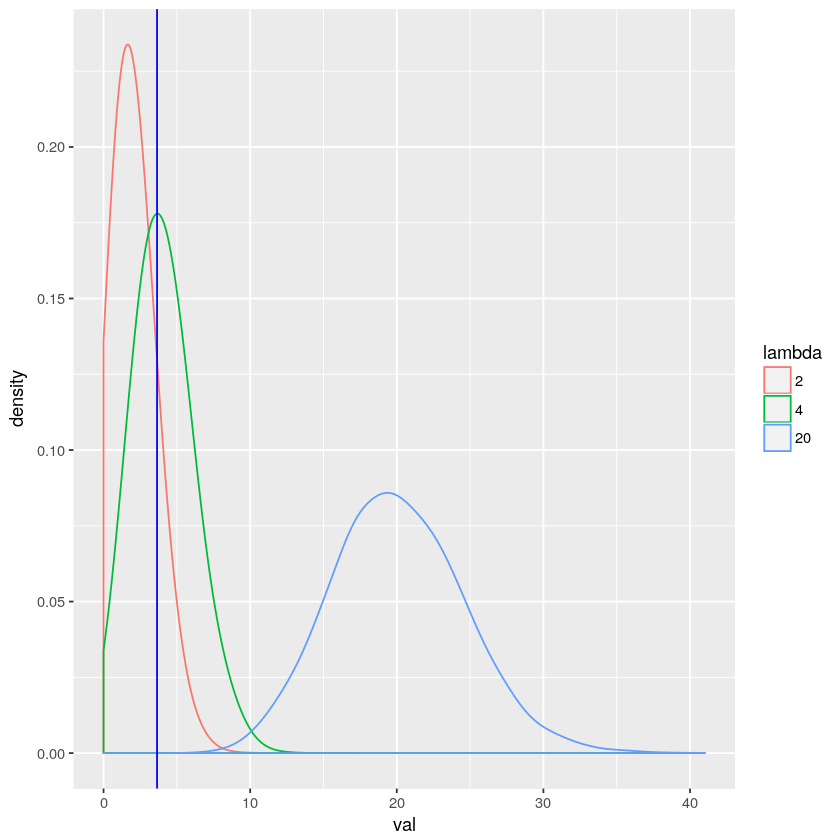

In [33]:
l<-c(2,4,20)
numSamples<-10000
myPoissonDataVector<-rpois(numSamples*length(l),l)


myPoissonDataFrame<-data.frame(val=myPoissonDataVector,lambda=rep(l,numSamples))
myPoissonDataFrame$lambda<-factor(myPoissonDataFrame$lambda)

require(ggplot2)
ggplot(data=myPoissonDataFrame, aes(x=val,colour=lambda)) + geom_density(bw=1)+
 geom_vline(xintercept=3.65,color="blue")

Podemos comprobar como una distribución **binomial** a medida que $n \rightarrow \infty$ y $p \rightarrow 0$, manteniendo $\lambda=n·p$ constante converge a una distribución de **Poisson** con media $\lambda$.


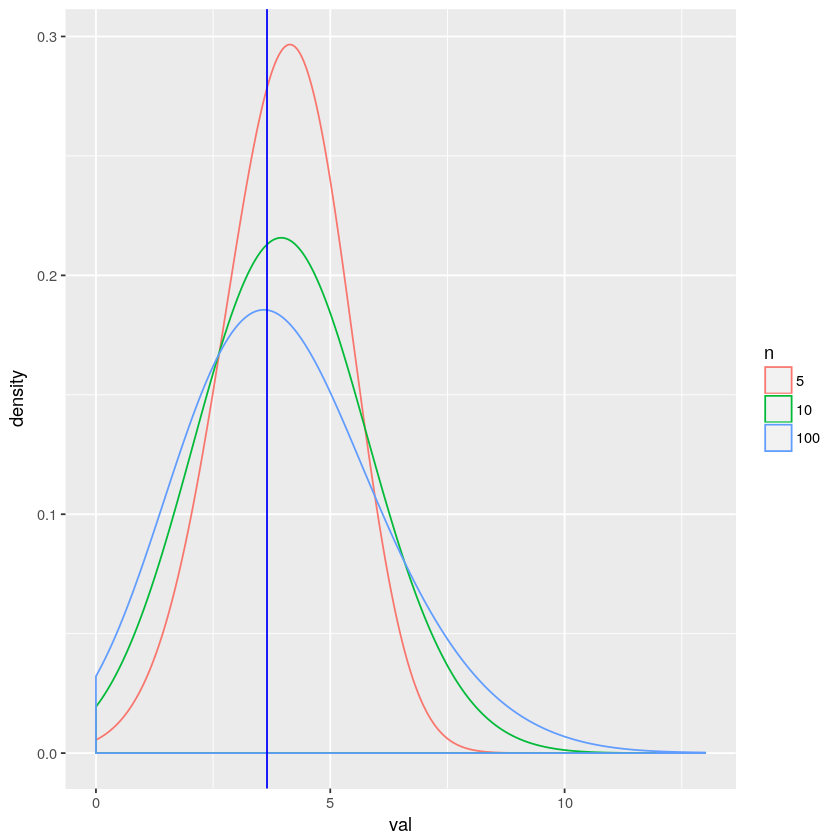

In [41]:
l<-4

n<-c(5,10,100)
p<-l/n

numSamples<-10000

myBinomialDataVector<-rbinom(numSamples*length(n),size=n,prob=p)


myPoissonDataFrame<-data.frame(val=myBinomialDataVector,n=rep(n,numSamples))
myPoissonDataFrame$n<-factor(myPoissonDataFrame$n)

require(ggplot2)
ggplot(data=myPoissonDataFrame, aes(x=val,colour=n)) + geom_density(bw=1)+
  geom_vline(xintercept=3.65,color="blue")


## Distribución exponencial

Describe el tiempo que transcurre entre dos eventos que siguen una distribución de Poisson. Es decir, dado un proceso que produce eventos a de forma continua e independiente a una tasa constante, el tiempo entre dos eventos vendrá dado por una distribución exponencial.

Ejemplo: Tiempo entre dos llamadas consecutivas que llegan a una antena de telefonía móvil en una franja horaria.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=\lambda^{-1} \qquad
\sigma^2=\lambda^{-1}
\\]

**Función de densidad de probabilidad**

\\[
f(k;p)= \left\\{ 
\begin{matrix} 
\lambda e^{-\lambda x} & \text{si  } x \geq 0 \\  
0 & \text{si  } k<0 
\end{matrix}
\right.
\\]


Función de densidad de probabilidad. [Fuente](https://en.wikipedia.org/wiki/Exponential_distribution)      | Función acumulativa de probabilidad
:---------------------------------------:|:----------------------------------------:
![](./func_Exponential_Distribution_PDF.png)| ![](func_Exponential_Distribution_CDF.png)

Para valores grandes de $\lambda$, en torno a $\lambda>100$, la distribución de Poisson tiende a una gaussiana de media $\mu=\lambda$ y desviación típica $\sigma=\sqrt{\lambda}$.

### Funciones en R

Podemos generar una variable aleatoria que siga una distribución de exponencial mediante la función *rexp()*.

Por ejemplo si queremos generar 10000 muestras de varias distribuciones exponenciales con medias 2, 4 y 20 basta con ejecutar:

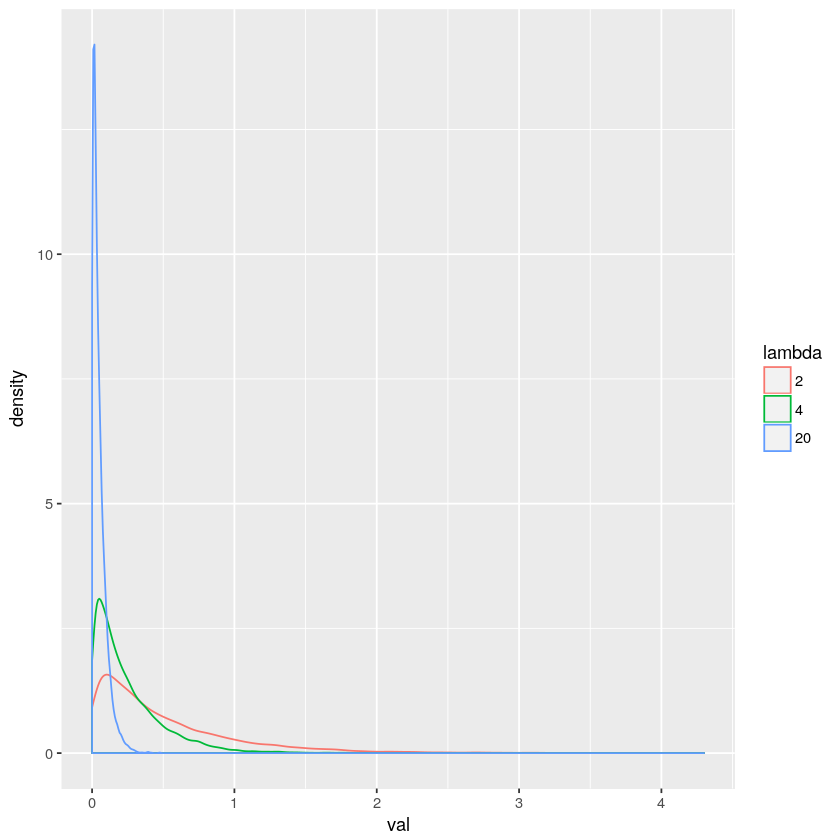

In [45]:
l<-c(2,4,20)
numSamples<-10000
myExponentialDataVector<-rexp(numSamples*length(l),l)


myExponentialDataFrame<-data.frame(val=myExponentialDataVector,lambda=rep(l,numSamples))
myExponentialDataFrame$lambda<-factor(myExponentialDataFrame$lambda)

require(ggplot2)
ggplot(data=myExponentialDataFrame, aes(x=val,colour=lambda)) + geom_density()

## Distribución Gaussiana

La distribución normal o gaussiana es posiblemente la distribución de probabilidad más utilizada. Su importancia radica en el teorema central del límite.

Su función de densidad de probabilidad es:
\\[
P(x\;|\;\mu ,\sigma )={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}
\\]

La función acumulativa de probabilidad no tiene una forma explícita:
\\[
P(X>x\;|\;\mu ,\sigma )={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;\int _{-\infty}^x e^{-{\frac {(t-\mu )^{2}}{2\sigma ^{2}}}} dt
\\]



El Teorema central del límite establece que para distribuciones independientes e identicamente distribuidas con media $\mu < \infty$ y varianza $0< \sigma^2 < \infty$, la suma de un gran número de variables aleatorias se distribuye aproximadamente como una normal.

Función de densidad de probabilidad. [Fuente](https://en.wikipedia.org/wiki/Normal_distribution)      | Función acumulativa de probabilidad
:---------------------------------------:|:----------------------------------------:
![](./func_Gaussian_Distribution_PDF.png)| ![](func_Gaussian_Distribution_CDF.png)

### Regla 68-95-99.7

Es una regla para acordarse de la distribución de datos cuando estos siguen una distribución gaussiana. Nos dice que porcentaje de datos se encuentran separados de la media en una, dos o tres desviaciones típicas. Es similar a la desigualdad de Tschebyshev pero más restrictiva, al ser solo válida para distribuciones gaussianas:

\\[
\begin{aligned}\Pr(\mu -\;\,\sigma \leq X\leq \mu +\;\,\sigma )&\approx 0.6827\\\Pr(\mu -2\sigma \leq X\leq \mu +2\sigma )&\approx 0.9545\\\Pr(\mu -3\sigma \leq X\leq \mu +3\sigma )&\approx 0.9974\end{aligned}
\\]


Histograma variable gaussiana. [Fuente](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)
![](regla68-95-99.png)

In [36]:
2.1+13.6+0.15

[1] 15.85

### Funciones en R


En R tenemos las siguientes funciones:
* dnorm(x, mean = 0, sd = 1): Da la probabilidad de P(X=x)
* pnorm(q, mean = 0, sd = 1): Da la probabilidad de P(X<x)
* qnorm(p, mean = 0, sd = 1): Devuelve resultados de los percentiles (cuantiles),es decir, da el valor de x tal que P(X>x)=p
* rnorm(n, mean = 0, sd = 1): Genera un vector aleatorio de dimensión n

Donde la media y la destviación típica se definen con los parámetros $mean$ y $sd$

La función *qnorm* es la inversa de *pnorm*.

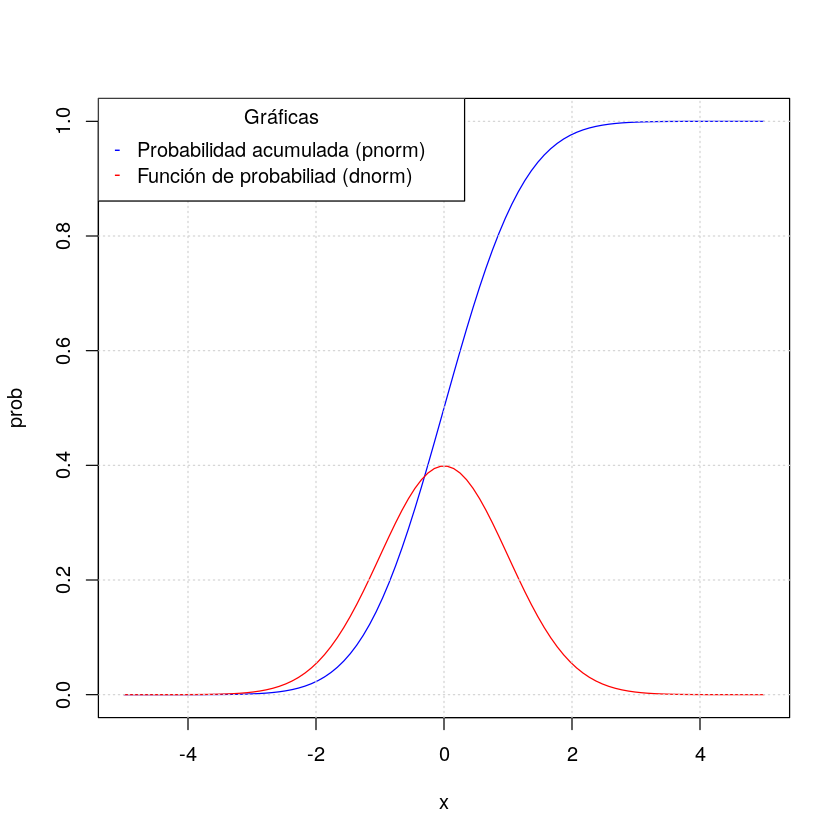

In [52]:
x<-seq(-5,5,length.out=100)
plot(x,pnorm(x),t="l",col="blue",ylab="prob")
lines(x,dnorm(x),t="l",col="red")
#lines(qnorm(x),x,t="l",col="green")

grid()
legend("topleft", c("Probabilidad acumulada (pnorm)","Función de probabiliad (dnorm)"), pch = '-', title = "Gráficas", col=c("blue","red"))

### Operaciones con gaussianas

Sumar una constante a una variable aleatoria gaussiana modifica su media en la misma medida.
Multiplicar una constante a una variable aleatoria gaussiana cambia su media y desviación típica por el mismo factor.


In [45]:
x<-rnorm(100000, mean = 4, sd = 2)
print(paste0("Tenemos una variable aleatoria gausiana de media: ",mean(x)," y desviación típica:",sd(x)))

nm<-6
x<-x+nm
print(paste0("Si le sumamos ",nm," su nueva media será: ",mean(x)," y desviación típica:",sd(x)))

nsd<-1.5
x<-x*nsd
print(paste0("Si la multiplicamos por ",nsd," su nueva media será: ",mean(x)," y desviación típica:",sd(x)))

[1] "Tenemos una variable aleatoria gausiana de media: 3.99151488758212 y desviación típica:1.99498015919511"
[1] "Si le sumamos 6 su nueva media será: 9.99151488758213 y desviación típica:1.99498015919511"
[1] "Si la multiplicamos por 1.5 su nueva media será: 14.9872723313732 y desviación típica:2.99247023879266"


### Comprobación teorema centrál del límite

En el siguiente ejemplo vamos a crear vectores de 10.000 entradas que sigan una distribución uniforme entre -1 y 1. 
Posteriormente vamos a sumar los vectores entre sí y representar la función de densidad. 
Cuantos más vectores de distribución uniforme sumemos, la curva tiende más a una gaussiana.

[1] "Desviación típica sumando 10 uniformes: 1.78482444992467"

[1] "Desviación típica sumando 100 uniformes: 5.74863812350136"

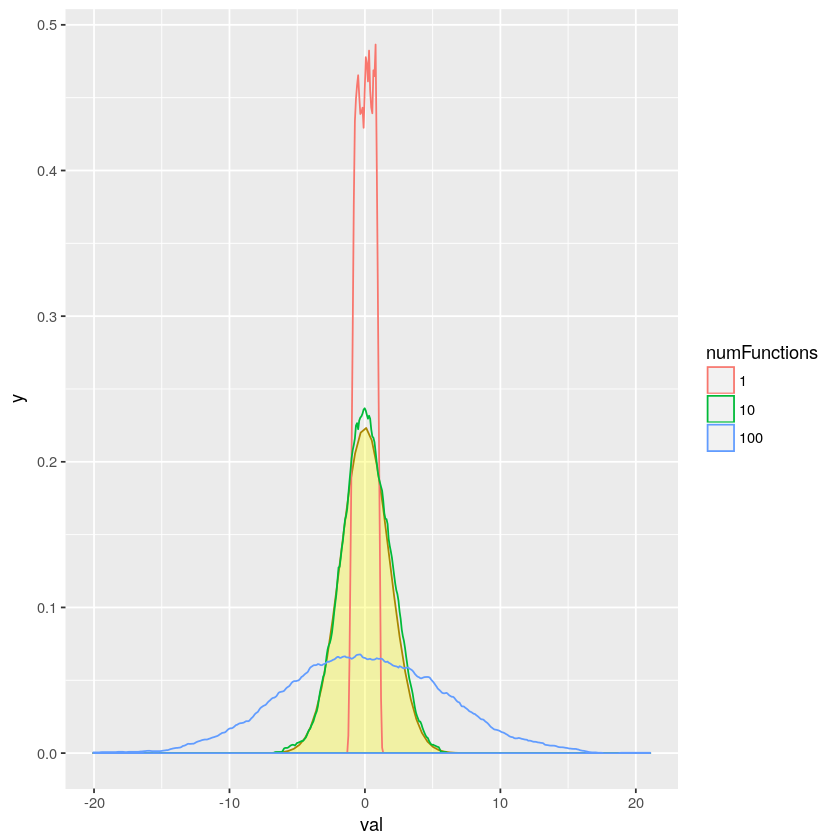

In [27]:
numSamples<-1000

myRandomDataFrame<-data.frame(val=as.numeric(),numFunctions=as.numeric())
for (numFunctions in c(1,10,100)){
    myRandomVector<-rep(0,numSamples)
    for (i in 1:numFunctions){
        myRandomVector<-myRandomVector+runif(numSamples,min = -1,max = 1)
    }
    myRandomVector<-myRandomVector
    myRandomDataFrame<-rbind(myRandomDataFrame,data.frame(val=myRandomVector,numFunctions=numFunctions))
}

myRandomDataFrame$numFunctions<-as.factor(myRandomDataFrame$numFunctions)
sd10<-sd(myRandomDataFrame$val[myRandomDataFrame$numFunctions==10])

paste("Desviación típica sumando 10 uniformes:",sd10)
paste("Desviación típica sumando 100 uniformes:",sd(myRandomDataFrame$val[myRandomDataFrame$numFunctions==100]))
require(ggplot2)
ggplot(data=myRandomDataFrame, aes(x=val,color=numFunctions)) + 
    #geom_density(kernel="rectangular",bw=0.07)
    stat_function(fun=dnorm,args = list(mean = 0, sd=sd10), geom="area",color="#a98600",fill="yellow",alpha=0.3)+
    geom_density(kernel="rectangular")
    

### Unidad tipificada (Z-score)

Es el número de desviaciones típicas sobre la media en el cual se encuentra el valor seleccionado.
\\[
z=\frac{x-\mu}{\sigma}
\\]

### Función Q(z)

La función Q(z) es la probabilidad de que una variable aleatoria gaussiana obtenga un valor mayor que x desviaciones típicas por encima de la media.
\\[
Q(z)=P(X>z)=P \left( X>\frac{x-\mu}{\sigma} \right)
\\]
Si suponemos media 0:
\\[
Q(z)=P(X>z)=P \left( \sigma X> x \right)
\\]


x - desviaciones $\sigma$ | Q(x) - probabilidad
:-----:|:---:
$-\infty$ | 1
-2 | 0.9772499
-1 | 0.8413447
0  | 0.5
1  | 0.1586533
2  | 0.02275013
$\infty$ | 0


In [46]:
print("En R se calcula con pnorm:")
pnorm(1,lower.tail = F)

print("La inversa se calcula con qnorm:")
qnorm(0.158655,lower.tail = F)

[1] "En R se calcula con pnorm:"


[1] 0.1586553

[1] "La inversa se calcula con qnorm:"


[1] 1.000001

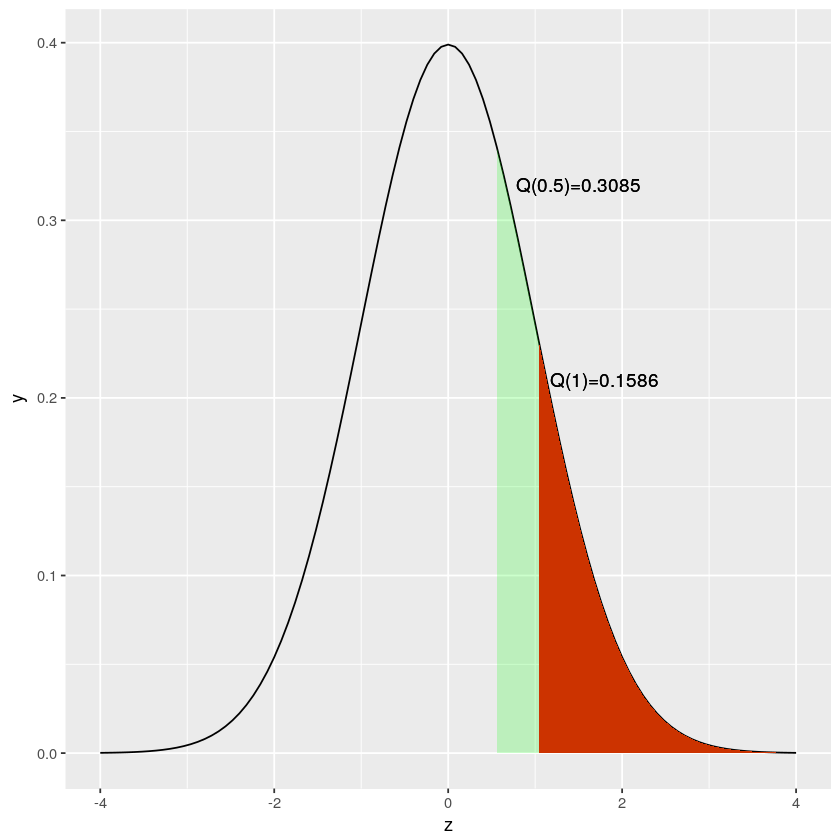

In [45]:
require(ggplot2)
qnorm1sd<-function(x){
    out<-dnorm(x)
    out[x<1]<-NA
    out
}

qnorm05sd<-function(x){
    out<-dnorm(x)
    out[x<0.5]<-NA
    out
}

xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dnorm,args = list(mean = 0, sd=1))+
  stat_function(fun=qnorm1sd, geom="area",fill="red")+
  geom_text(x=1.8,y=0.21,size=4,label="Q(1)=0.1586")+ 
  stat_function(fun=qnorm05sd, geom="area",fill="green",alpha=0.2)+
  geom_text(x=1.5,y=0.32,size=4,label="Q(0.5)=0.3085")
  

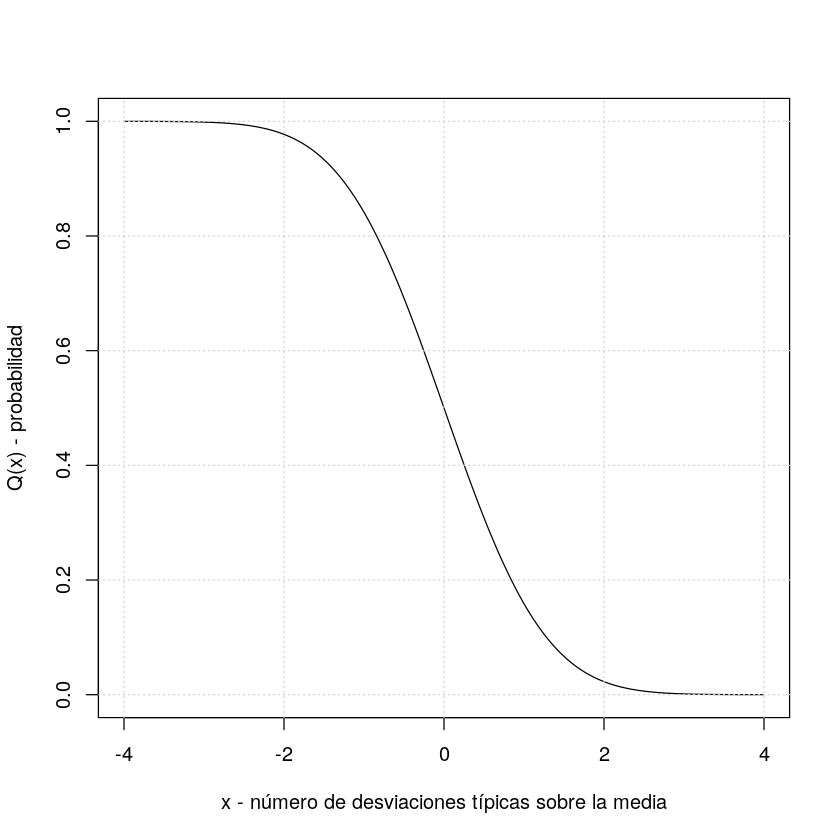

In [49]:
x<-seq(-4,4,length.out=1000)
plot(x,pnorm(x,lower.tail = F),t="l",ylab="Q(x) - probabilidad",xlab="x - número de desviaciones típicas sobre la media")
grid()
# Es equivalente a:
#plot(x,1-pnorm(x),t="l")

## Gráfico Q-Q

El grafico Q-Q se utiliza para comparar dos distribuciones pintando sus percentiles una contra la otra, generalmente se utiliza para comparar si una variable sigue una distribución gausiana.

In [118]:
numSamples<-10
#Empezamos con una variable aleatoria ordenada
var_random <-sort(runif(numSamples,min=-5,max=5))

#calculamos su probabilidad de que P(X>x)
p = ((numSamples-1):0)/numSamples

#Basandonos en esta probabilidad, calculamos cual sería su valor si fuera gaussiana
z<-qnorm(p,lower.tail = F)

matrix(c(var_random,p,z),nrow=3,byrow = T,
       dimnames=list(c("x","P(X>x) o Q(x)","valor esperado de x si fuera gaussiana"),NULL))

x,-3.582184,-3.2919265,-2.3874950,-2.3691450,-1.024699,-0.1890958,0.3711062,2.9003971,3.674594,3.701091
P(X>x) o Q(x),0.900000,0.8000000,0.7000000,0.6000000,0.500000,0.4000000,0.3000000,0.2000000,0.100000,0.000000
valor esperado de x si fuera gaussiana,-1.281552,-0.8416212,-0.5244005,-0.2533471,0.000000,0.2533471,0.5244005,0.8416212,1.281552,Inf


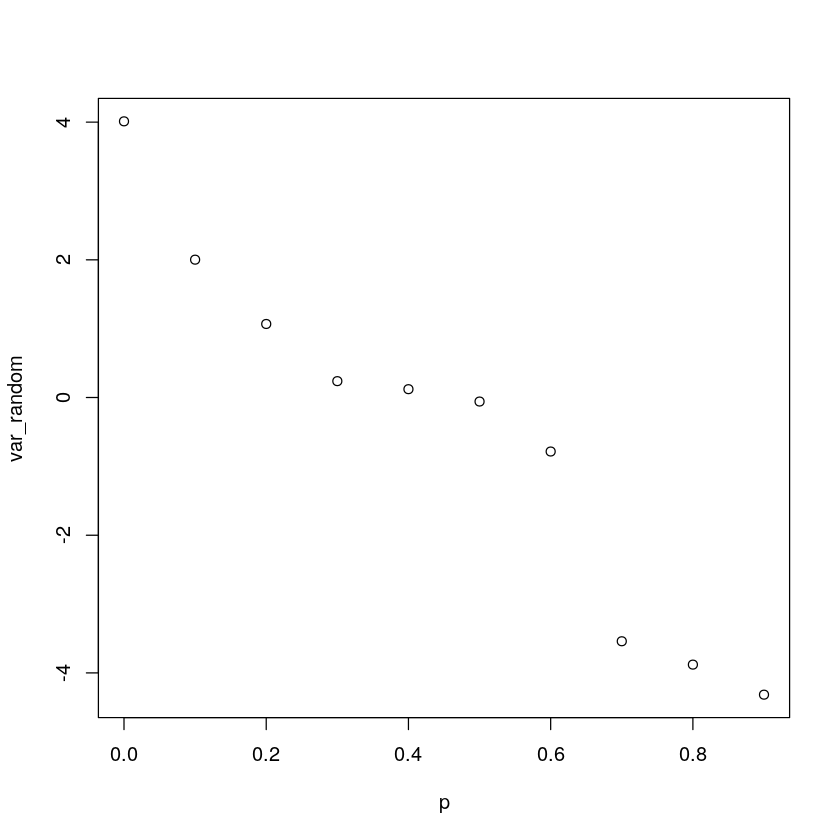

In [111]:
plot(p,var_random)

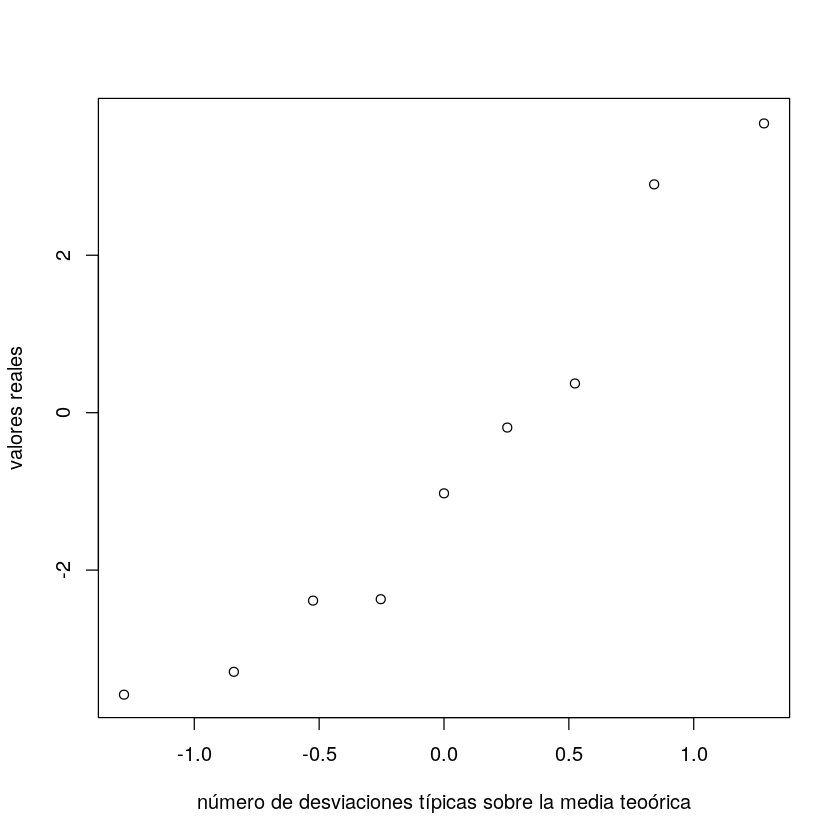

In [122]:
#El gráfico QQ sería:
plot(z,var_random,
     xlab="número de desviaciones típicas sobre la media teoórica",
     ylab="valores reales")

Evidentemente el gráfico Q-Q de una variable gaussiana es una linea recta

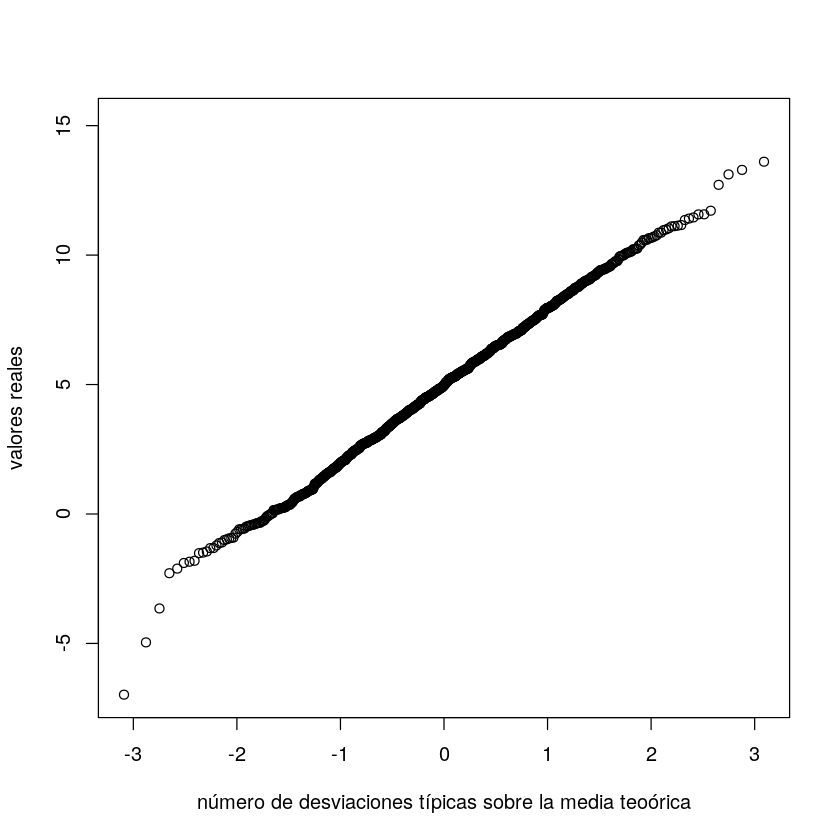

In [128]:
numSamples<-1000
gauss_random <-sort(rnorm(numSamples,mean=5,sd=3))
p = ((numSamples-1):0)/numSamples
z<-qnorm(p,lower.tail = F)
plot(z,gauss_random,
     xlab="número de desviaciones típicas sobre la media teoórica",
     ylab="valores reales")

In [ ]:
Existe una función para hacer esto mismo

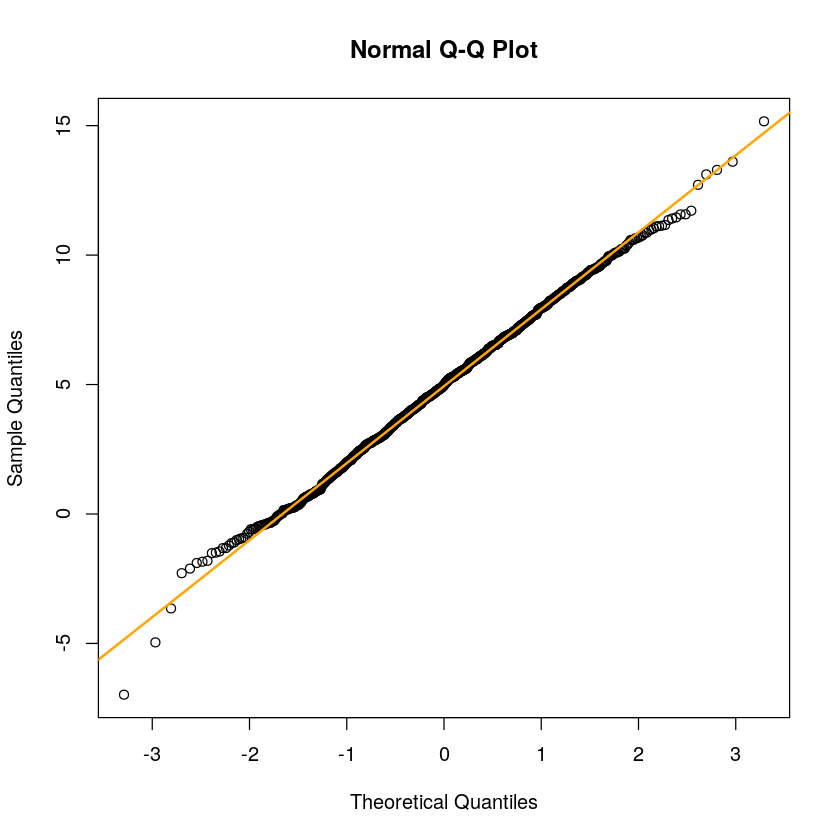

In [130]:
qqnorm(gauss_random)
qqline(gauss_random, col = 'orange', lwd =2)

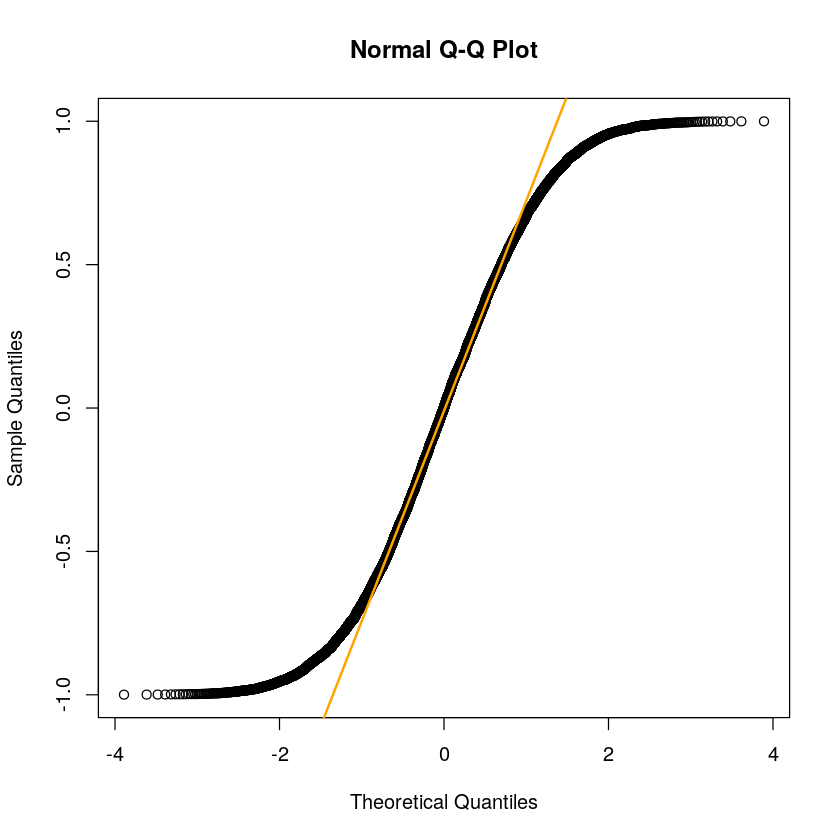

In [133]:

unif1<-subset(myRandomDataFrame,numFunctions==1)$val
qqnorm(unif1)
qqline(unif1, col = 'orange', lwd =2)

## Distribución chi-cuadrado

La función de distribución chi-cuadrado con $k$ grados de libertad aparece de sumar el cuadrado de $k$ variables que siguen gausianas independientes. Es usada principalmente para los tests estadísticos.


Su función de distribución es:
\\[
f(x;k)=\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}\end{cases}
\\]

Función de densidad de probabilidad. [Fuente](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2)      | Función acumulativa de probabilidad
:---------------------------------------:|:----------------------------------------:
![](./func_Gaussian_Distribution_PDF.png)| ![](func_Gaussian_Distribution_CDF.png)

Funciones en R

En R tenemos las siguientes funciones:
* dchisq(x, df, ncp = 0): Da la probabilidad de P(X=x)
* pchisq(q, df, ncp = 0): Da la probabilidad de P(X<x)
* qchisq(p, df, ncp = 0): Devuelve resultados de los percentiles (cuantiles),es decir, da el valor de x tal que P(X>x)=p
* rchisq(n, df, ncp = 0): Genera un vector aleatorio de dimensión n

Donde df es el número de grados de libertad